In [1]:
# @title
import pandas as pd

data = pd.read_csv('https://1stdataset.s3.us-east-2.amazonaws.com/CSVs/CSV-01-12/01-12/Syn.csv')
data.head()

/tmp/ipykernel_13759/2413015967.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('https://1stdataset.s3.us-east-2.amazonaws.com/CSVs/CSV-01-12/01-12/Syn.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,172.16.0.5,53058,192.168.50.1,53058,6,2018-12-01 13:30:30.741451,115799309,19,...,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,0,1,Syn
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,172.16.0.5,32237,192.168.50.1,32237,6,2018-12-01 13:30:30.741452,113973933,16,...,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,0,1,Syn
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,172.16.0.5,60495,192.168.50.1,9840,6,2018-12-01 13:30:30.741501,112,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,172.16.0.5,59724,192.168.50.1,59724,6,2018-12-01 13:30:30.741563,105985004,16,...,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,0,1,Syn
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,172.16.0.5,60496,192.168.50.1,32538,6,2018-12-01 13:30:30.741565,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,Syn


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582681 entries, 0 to 1582680
Data columns (total 88 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Unnamed: 0                    1582681 non-null  int64  
 1   Flow ID                       1582681 non-null  object 
 2    Source IP                    1582681 non-null  object 
 3    Source Port                  1582681 non-null  int64  
 4    Destination IP               1582681 non-null  object 
 5    Destination Port             1582681 non-null  int64  
 6    Protocol                     1582681 non-null  int64  
 7    Timestamp                    1582681 non-null  object 
 8    Flow Duration                1582681 non-null  int64  
 9    Total Fwd Packets            1582681 non-null  int64  
 10   Total Backward Packets       1582681 non-null  int64  
 11  Total Length of Fwd Packets   1582681 non-null  float64
 12   Total Length of Bwd Packets

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#from imblearn.over_sampling import SMOTE


# Pre-process the data
# Encode categorical features (e.g., IP addresses)
encoder = LabelEncoder()
data[' Source IP'] = encoder.fit_transform(data[' Source IP'])
data[' Destination IP'] = encoder.fit_transform(data[' Destination IP'])
data[' Timestamp'] = pd.to_datetime(data[' Timestamp']).astype(np.int64)
data[' Label'] = encoder.fit_transform(data[' Label'])
data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,281052,172.16.0.5-192.168.50.1-53058-53058-6,2,53058,20,53058,6,1543671030741451000,115799309,19,...,646237.483665,1709809.0,1.0,1.426117e+07,3.220326e+06,21714933.0,11043464.0,0,1,1
1,450424,172.16.0.5-192.168.50.1-32237-32237-6,2,32237,20,32237,6,1543671030741452000,113973933,16,...,19.595918,49.0,1.0,1.628198e+07,2.573891e+06,20019405.0,11993631.0,0,1,1
2,182979,172.16.0.5-192.168.50.1-60495-9840-6,2,60495,20,9840,6,1543671030741501000,112,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,1
3,41540,172.16.0.5-192.168.50.1-59724-59724-6,2,59724,20,59724,6,1543671030741563000,105985004,16,...,17.705259,48.0,1.0,1.514071e+07,3.077366e+06,20954123.0,11120336.0,0,1,1
4,358711,172.16.0.5-192.168.50.1-60496-32538-6,2,60496,20,32538,6,1543671030741565000,1,2,...,0.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,1,1


In [4]:
# Drop unnecessary columns in the CVs's
try:
  data = data.drop(['Unnamed: 0', 'Flow ID', 'SimillarHTTP'], axis=1)
except:
  print('Columns are dropped already')

# Set the desired number of majority class samples
num_majority_samples = 100000

# Get the minority class label
minority_class = data[' Label'].value_counts().idxmin()

# Separate majority and minority class samples
majority_samples = data[data[' Label'] != minority_class]
minority_samples = data[data[' Label'] == minority_class]

# Sample the majority class samples
majority_samples_sampled = majority_samples.sample(num_majority_samples, random_state=42)

# Combine the sampled majority class samples and minority class samples
balanced_data = pd.concat([majority_samples_sampled, minority_samples], axis=0)

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_data.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,2,46764,20,54407,6,1543671073629082000,1,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,2,63905,20,1500,6,1543671209745484000,48,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,2,13075,20,57071,6,1543671242221783000,1,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,2,55610,20,49268,6,1543671086648693000,102,2,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,2,9394,20,12215,6,1543671055399065000,4864011,6,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [5]:
balanced_data[' Label'].value_counts()

1    100000
0       392
Name:  Label, dtype: int64

In [6]:
data[' Label'].value_counts()

1    1582289
0        392
Name:  Label, dtype: int64

In [7]:
import pandas as pd

# Assuming your dataset is named 'data'
correlation = balanced_data[' Inbound'].corr(balanced_data[' Label'])
print("Correlation between 'Inbound' and 'Label':", correlation)


Correlation between 'Inbound' and 'Label': 0.8877407228945909


In [8]:
balanced_data[' Inbound'].value_counts()

1    100067
0       325
Name:  Inbound, dtype: int64

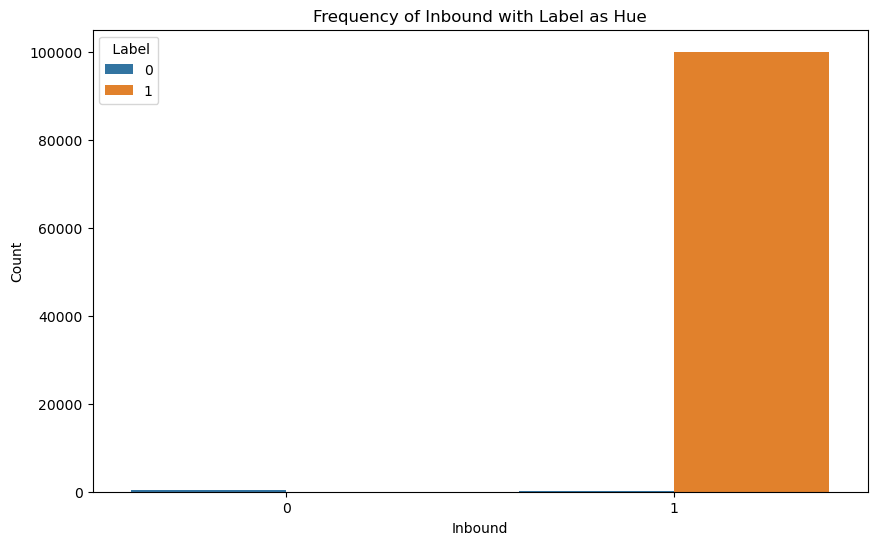

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Inbound', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue')
plt.xlabel('Inbound')
plt.ylabel('Count')
plt.show()


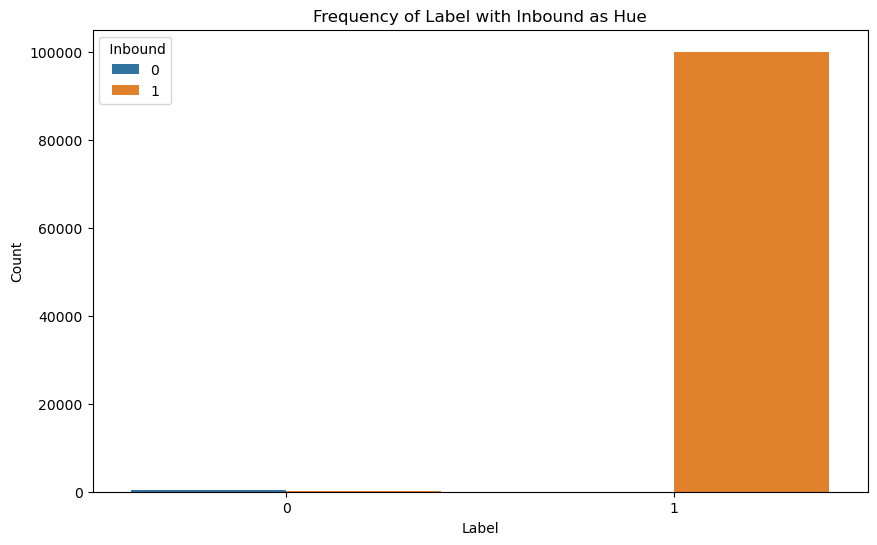

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_data, x=' Label', hue=' Inbound')
plt.title('Frequency of Label with Inbound as Hue')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


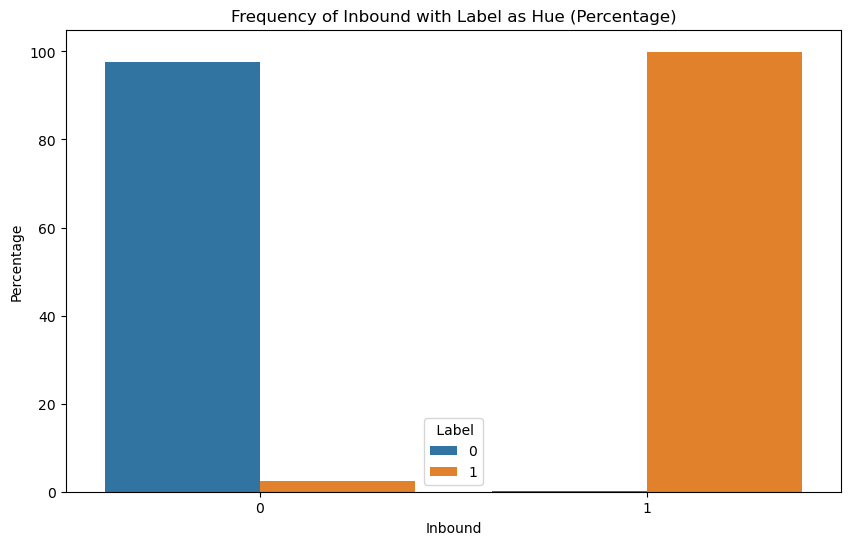

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataframe is named 'df'
inbound_label_counts = balanced_data.groupby([' Inbound', ' Label']).size().reset_index(name='Count')
total_counts = balanced_data.groupby([' Inbound']).size().reset_index(name='Total_Count')

inbound_label_counts = inbound_label_counts.merge(total_counts, on=' Inbound')
inbound_label_counts['Percentage'] = (inbound_label_counts['Count'] / inbound_label_counts['Total_Count']) * 100

plt.figure(figsize=(10, 6))
sns.barplot(data=inbound_label_counts, x=' Inbound', y='Percentage', hue=' Label')
plt.title('Frequency of Inbound with Label as Hue (Percentage)')
plt.xlabel('Inbound')
plt.ylabel('Percentage')
plt.show()


In [12]:
inbound_label_counts

,Inbound,Label,Count,Total_Count,Percentage
0,0,0,317,325,97.538462
1,0,1,8,325,2.461538
2,1,0,75,100067,0.074950
3,1,1,99992,100067,99.925050


In [13]:

# Split the data into train and test sets
X = balanced_data.drop([' Inbound',' Label'], axis=1)
y = balanced_data[' Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify = y, random_state=42)



In [14]:
X_train.isnull().sum().sum()

9027

In [15]:
import numpy as np

def check_data_issues(data):
    # Check for NaN values
    if data.isnull().values.any():
        print("There are NaN values in the dataset.")

    # Check for infinite values
    if np.isinf(data).values.any():
        print("There are infinite values in the dataset.")

    # Check for extremely large values
    max_value = data.max().max()
    if max_value > np.finfo(np.float64).max:
        print(f"There are values too large for dtype('float64') in the dataset. Max value: {max_value}")

    # Check for extremely small values
    min_value = data.min().min()
    if min_value < np.finfo(np.float64).min:
        print(f"There are values too small for dtype('float64') in the dataset. Min value: {min_value}")

# Check the training and testing data for any issues
check_data_issues(X_train)
check_data_issues(X_test)


There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf
There are NaN values in the dataset.
There are infinite values in the dataset.
There are values too large for dtype('float64') in the dataset. Max value: inf


In [16]:
# Replace infinity values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the mean of the corresponding column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create an empty DataFrame with the desired columns
model_comparison = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score"])

# Train and evaluate machine learning models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics to the DataFrame
    model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)

    print(f"{name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 score: {f1}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Display the comparison DataFrame
model_comparison

/tmp/ipykernel_13759/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Logistic Regression:
Accuracy: 0.9999667972640945
F1 score: 0.9999668670353665
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       1.00      1.00      1.00     30000

    accuracy                           1.00     30118
   macro avg       1.00      1.00      1.00     30118
weighted avg       1.00      1.00      1.00     30118





/tmp/ipykernel_13759/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


Random Forest:
Accuracy: 0.9999667972640945
F1 score: 0.9999668670353665
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       118
           1       1.00      1.00      1.00     30000

    accuracy                           1.00     30118
   macro avg       1.00      1.00      1.00     30118
weighted avg       1.00      1.00      1.00     30118



Support Vector Machine:
Accuracy: 0.9998007835845674
F1 score: 0.9998032432477352
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       118
           1       1.00      1.00      1.00     30000

    accuracy                           1.00     30118
   macro avg       0.98      1.00      0.99     30118
weighted avg       1.00      1.00      1.00     30118





/tmp/ipykernel_13759/3989400141.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_comparison = model_comparison.append({"Model": name, "Accuracy": accuracy, "F1 Score": f1}, ignore_index=True)


,Model,Accuracy,F1 Score
0,Logistic Regression,0.999967,0.999967
1,Random Forest,0.999967,0.999967
2,Support Vector Machine,0.999801,0.999803


In [18]:
feature_columns = X.columns

# Get the Random Forest model from the 'models' dictionary
random_forest_model = models['Random Forest']

# Get feature importances
importances = random_forest_model.feature_importances_

# Create a DataFrame with the feature names and their corresponding importances
feature_importances = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances DataFrame
# Filter the DataFrame to show only features with non-zero importance
non_zero_importances = feature_importances[feature_importances['Importance'] > 0]

# Display the filtered DataFrame
non_zero_importances


,Feature,Importance
0,Source IP,0.119828
2,Destination IP,0.100285
52,ACK Flag Count,0.089636
71,Init_Win_bytes_forward,0.067031
47,Packet Length Variance,0.061350
...,...,...
76,Active Std,0.000035
81,Idle Max,0.000031
80,Idle Std,0.000025
34,Bwd IAT Min,0.000019


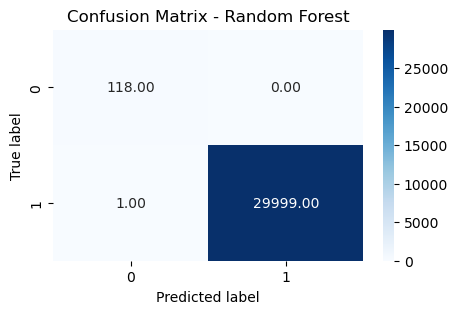

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Choose the model you want to use, for example, Random Forest
model = models["Random Forest"]
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
